In [1]:
from IPython.display import display
from IPython.html import widgets
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
import numpy as np

In [3]:
%matplotlib inline

In [4]:
dwells = pd.read_csv('~/biokey_data/dwells.csv')

In [5]:
num_users = 5
users = dwells.user_id.value_counts()
dwells = dwells.loc[dwells.user_id.isin(users.iloc[:num_users].index)]

In [6]:
def user_durations(user_dwells, seq, thresh=400):
    df = user_dwells.copy()
    length = len(seq.split('-'))
    df.loc[:,'seq'] = ''
    for i in range(length):
        df.loc[:,'seq'] += df.key.shift(-i) + ('-' if i < length - 1 else '')
    df['duration'] = df.up.shift(-length) - df.down
    return df.loc[(df.seq == seq) & (df.duration < length*thresh)].duration.apply(np.log)

In [11]:
def plot_seq_comp(seq):
    dur = dwells.groupby('user_id').apply(lambda x: user_durations(x, seq)).reset_index()[['user_id', 'duration']]
    return dur.groupby('user_id').duration.plot.hist(normed=True, title=seq, alpha=0.5)

Text(value='', description='Sequence to plot')

Plotting E-R


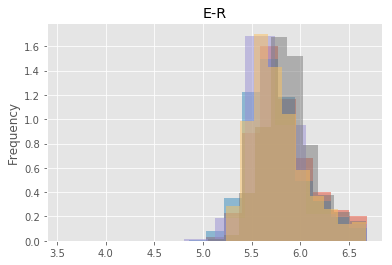

In [12]:
# displaying the text widget
text = widgets.Text(description="Sequence to plot", width=200)
display(text)

# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    print('Plotting %s' % text.value.upper())
    plot_seq_comp(text.value.upper())

    
text.on_submit(handle_submit)

In [ ]:
np